# Juan Pablo Montenegro Erazo - CC1007778301

## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Hint:


```python
df['time'] =  pd.to_datetime(df.time)
df.set_index("time", inplace=True)
df = df.drop(columns = ["Unnamed: 0"])
df["DiffClose"] = df.close.diff()
df2 = df[["DiffClose", "close"]][1:]
df2.DiffClose.hist(bins=1000)


!pip install fitter


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()a
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]




f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'genhyperbolic',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]



df2.groupby(pd.Grouper(freq='15D')).mean()
```

# Solución

Para realizar el primer punto se descargó el paquete `ucimlrepo` como lo muestra la [pagina web del dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). Despues de esto se concatenaron las columnas `ID`, `Diagnosis` con el dataframe de features `X`, luego se descargó este archivo en formato .csv y lo subí a mi carpeta de GitHub del curso, para después acceder al dataframe desde una dirección web. El codigo necesario para hacer esto se muestra a continuación

```python
!pip install ucimlrepo
```

```python
from ucimlrepo import fetch_ucirepo
  
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features # features del dataset
y = breast_cancer_wisconsin_diagnostic.data.targets # columna "Diagnosis"

columna_ID = breast_cancer_wisconsin_diagnostic.data.ids # columna ID
df = pd.concat([columna_ID, y, X], axis=1)
df.to_csv("Breast Cancer Wisconsin (Diagnostic).csv", index=False) # Descargamos el archivo en formato .csv
```

In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Leer los datos desde una página web

ruta = "https://raw.githubusercontent.com/Juan-Pablo-Montenegro/002_EstudiantesAprendizajeEstadistico/refs/heads/main/semestre2024-2/Estudiantes/Juan_Pablo_Montenegro_Erazo_01/Datasets/Breast%20Cancer%20Wisconsin%20(Diagnostic).csv"

df = pd.read_csv(ruta)
df

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [551]:
# 2. Renombrar las columnas en formato PascalCase

def pascal(nombre):

    palabras = nombre.split("_")
    nombre_pascal = ""

    for palabra in palabras:
        nombre_pascal += palabra.capitalize()

    return nombre_pascal


lista_columnas = list(df.columns)

for columna in lista_columnas: # Cambio el nombre de las columnas
    nuevo_nombre_columna = pascal(columna)
    df = df.rename(columns={columna: nuevo_nombre_columna})

df.columns

Index(['Id', 'Diagnosis', 'Radius1', 'Texture1', 'Perimeter1', 'Area1',
       'Smoothness1', 'Compactness1', 'Concavity1', 'ConcavePoints1',
       'Symmetry1', 'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2',
       'Area2', 'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3'],
      dtype='object')

In [552]:
# 3. Utilizar los métodos head(), tail(), describe() e info() para obtener información sobre el DataFrame

df.head()

,Id,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [553]:
df.tail()

,Id,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [554]:
df.describe()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 569 non-null    int64  
 1   Diagnosis          569 non-null    object 
 2   Radius1            569 non-null    float64
 3   Texture1           569 non-null    float64
 4   Perimeter1         569 non-null    float64
 5   Area1              569 non-null    float64
 6   Smoothness1        569 non-null    float64
 7   Compactness1       569 non-null    float64
 8   Concavity1         569 non-null    float64
 9   ConcavePoints1     569 non-null    float64
 10  Symmetry1          569 non-null    float64
 11  FractalDimension1  569 non-null    float64
 12  Radius2            569 non-null    float64
 13  Texture2           569 non-null    float64
 14  Perimeter2         569 non-null    float64
 15  Area2              569 non-null    float64
 16  Smoothness2        569 non

In [556]:
# 4. Contabilizar la cantidad de valores nulos (null o NaN) en el DataFrame. Si se encuentran valores nulos, ¿qué estrategia propondrías
# para reemplazarlos?

serie_null = df.isnull().sum()
serie_NaN = df.isna().sum()
diccionario = {"Cantidad de valores null": serie_null, "Cantidad de valores NaN": serie_NaN}
df_nulos = pd.DataFrame(diccionario)
df_nulos

,Cantidad de valores null,Cantidad de valores NaN
Id,0,0
Diagnosis,0,0
Radius1,0,0
Texture1,0,0
Perimeter1,0,0
Area1,0,0
Smoothness1,0,0
Compactness1,0,0
Concavity1,0,0
ConcavePoints1,0,0


In [557]:
print("Hay 0 valores NaN y 0 valores nulos")

Hay 0 valores NaN y 0 valores nulos


In [558]:
# 5. Identificar los valores únicos en la columna target que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza
# el método unique() para mostrar estos valores.

df["Diagnosis"].unique()

array(['M', 'B'], dtype=object)

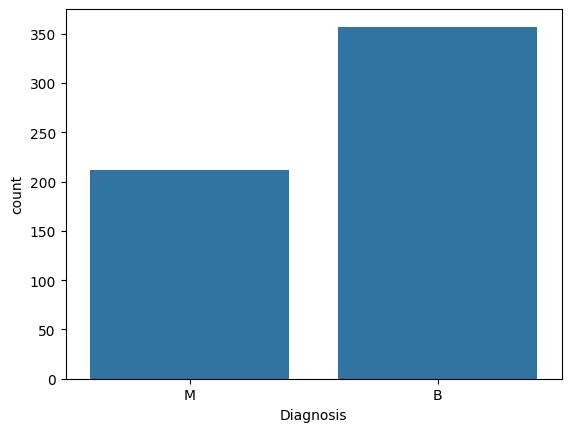

In [559]:
# 6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería seaborn y el método countplot():

import seaborn as sns

conteo = sns.countplot(data=df, x="Diagnosis")

In [560]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
B,357
M,212


In [561]:
# 7. Agregar una nueva columna llamada DiagnosisNumeric donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta
# M (Maligno).

nueva_columna = df['Diagnosis'].map({'B': 0, 'M': 1})
df.insert(2, 'DiagnosisNumeric', nueva_columna)
df

,Id,Diagnosis,DiagnosisNumeric,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [562]:
# 8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula: (x - mean(x)) / std(x)

df_normalizado = df.copy()

for column in df.columns:

    if pd.api.types.is_numeric_dtype(df_normalizado[column]):
        df_normalizado[column] = (df_normalizado[column] - df_normalizado[column].mean()) / df_normalizado[column].std()

df_normalizado

,Id,Diagnosis,DiagnosisNumeric,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,-0.236197,M,1.296535,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,-0.236196,M,1.296535,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,0.431362,M,1.296535,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,0.431741,M,1.296535,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,0.431821,M,1.296535,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235524,M,1.296535,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,-0.235522,M,1.296535,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,-0.235520,M,1.296535,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,-0.235518,M,1.296535,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [563]:
# 9. Agrupar características similares y calcular su promedio. Para las siguientes características:
# ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean',
# "SymmetryMean", "FractalDimensionMean"]

columnas_agrupadas = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
                      'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]

columnas_interes = [] # Lista donde pondremos las palabras por las que vamos a agrupar

for columna in columnas_agrupadas: # Quitamos "Mean" del nombre de columnas_agrupadas para ponerlo en columnas_interes
    nombre_grupo = columna[:-4]
    columnas_interes.append(nombre_grupo)


df2 = pd.DataFrame()


for columna_interes in columnas_interes:

    grupo = []

    for columna_df in df.columns:

        if columna_df.startswith(columna_interes):
            grupo.append(columna_df)

    df2[columna_interes + "Mean"] = df[grupo].mean(axis=1)

df2

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908
...,...,...,...,...,...,...,...,...,...,...
564,16.062000,16.682000,105.257667,1221.566667,0.087433,0.118703,0.235527,0.128347,0.129913,0.043873
565,14.861833,22.987667,97.134333,1030.346667,0.073390,0.106610,0.168333,0.092497,0.150460,0.041399
566,12.012133,21.091667,79.475000,676.883333,0.068118,0.149670,0.160037,0.070130,0.131327,0.046191
567,15.688667,23.448333,110.157333,1057.406667,0.096441,0.402227,0.453757,0.144547,0.223880,0.066782


<Axes: xlabel='RadiusMean', ylabel='Count'>

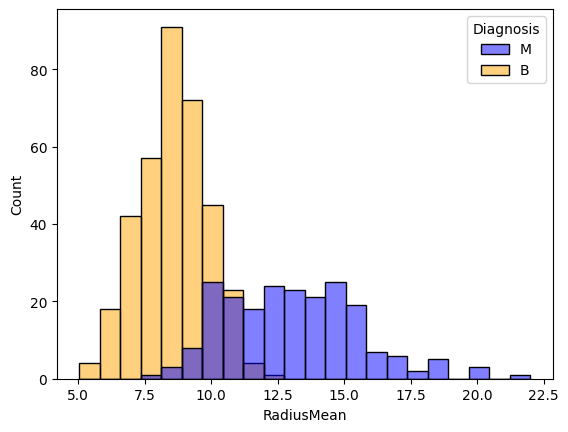

In [564]:
# 10. Crear un gráfico donde se muestre el histograma de la columna RadiusMean separado por las etiquetas B y M, utilizando colores diferentes
# (naranja y azul, respectivamente) para cada diagnóstico.

df2 = pd.concat([df, df2], axis = 1)

sns.histplot(data=df2, x="RadiusMean", hue="Diagnosis", multiple="layer", palette=["blue", "orange"])


In [565]:
df2

,Id,Diagnosis,DiagnosisNumeric,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,...,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,16.062000,16.682000,105.257667,1221.566667,0.087433,0.118703,0.235527,0.128347,0.129913,0.043873
565,926682,M,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,14.861833,22.987667,97.134333,1030.346667,0.073390,0.106610,0.168333,0.092497,0.150460,0.041399
566,926954,M,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,12.012133,21.091667,79.475000,676.883333,0.068118,0.149670,0.160037,0.070130,0.131327,0.046191
567,927241,M,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,15.688667,23.448333,110.157333,1057.406667,0.096441,0.402227,0.453757,0.144547,0.223880,0.066782


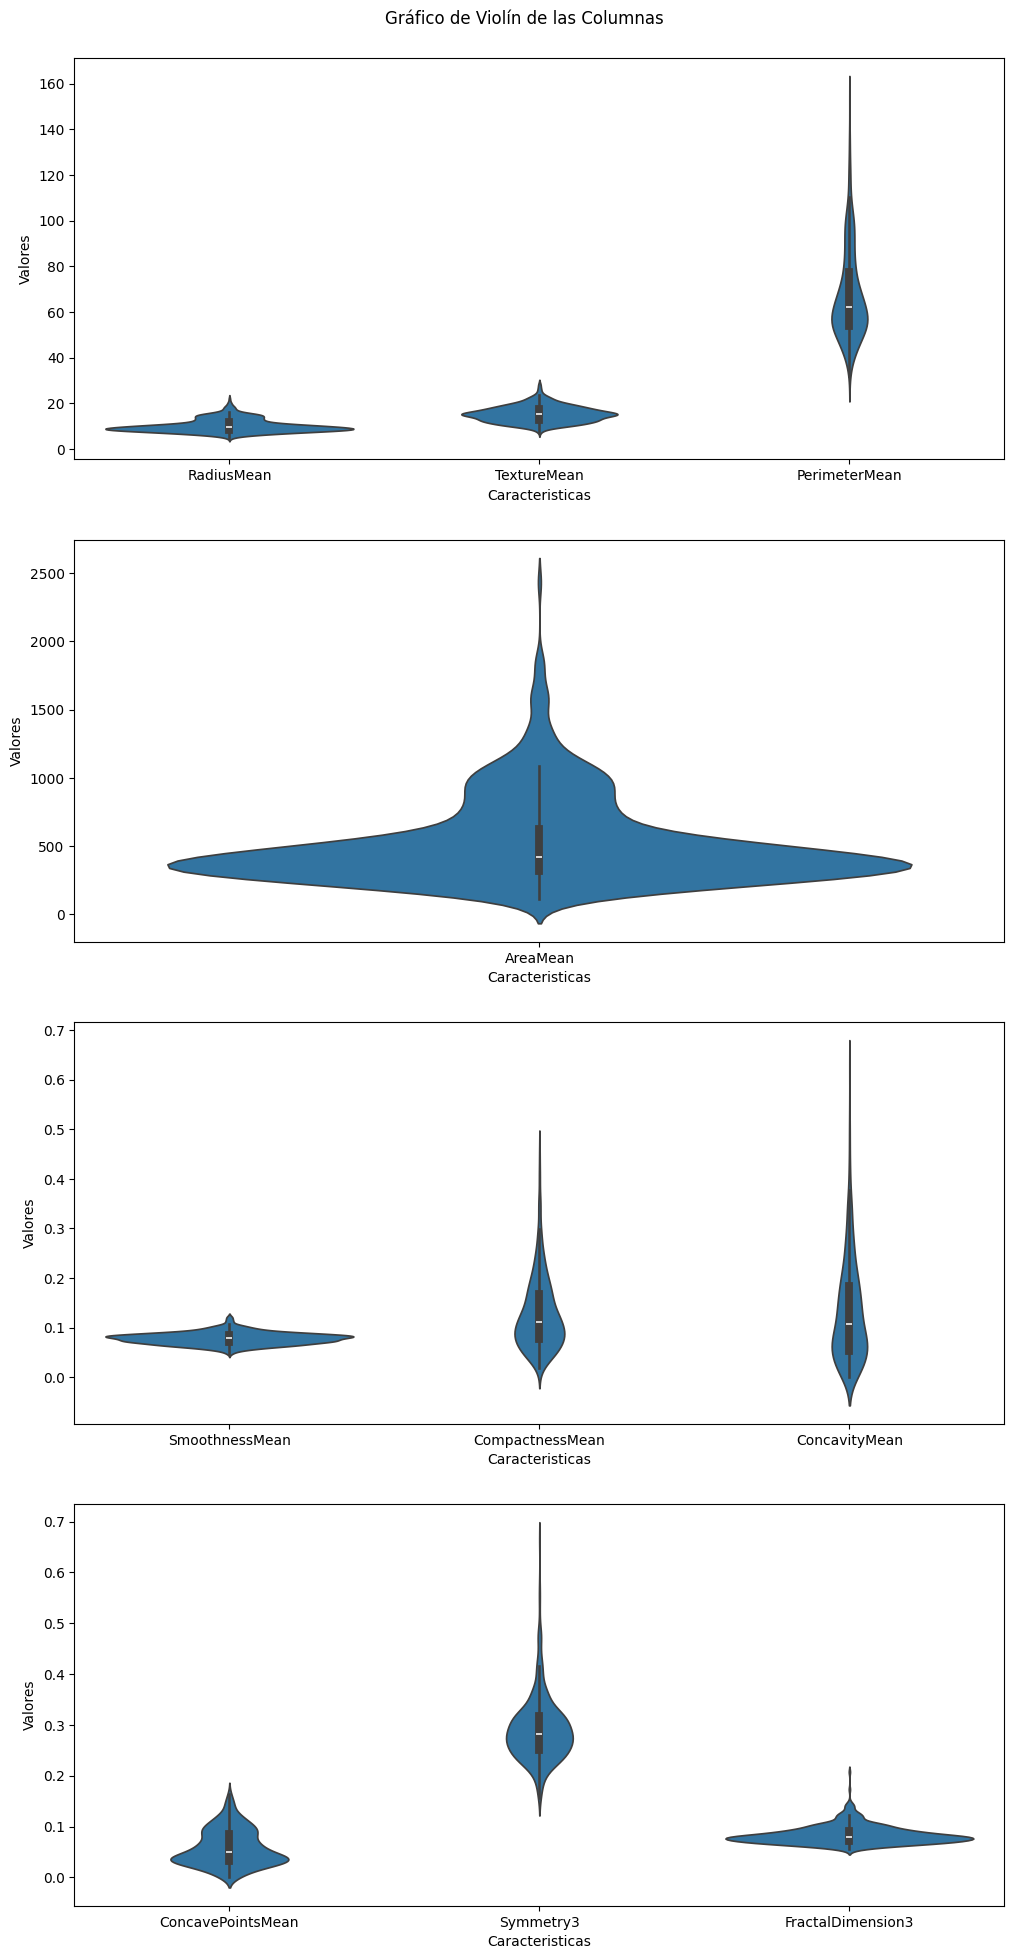

In [566]:
# 11. Generar gráficos de violín con seaborn para múltiples características. Para las columnas:
"""
RadiusMean
TextureMean
PerimeterMean
AreaMean
SmoothnessMean
CompactnessMean
ConcavityMean
ConcavePointsMean
Symmetry3
FractalDimension3
"""

lista_columnas = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
                'ConcavePointsMean', 'Symmetry3', 'FractalDimension3']

df_seleccionado1 = df2[lista_columnas[:3]]
df_seleccionado2 = df2[lista_columnas[3:4]]
df_seleccionado3 = df2[lista_columnas[4:7]]
df_seleccionado4 = df2[lista_columnas[7:]]

#lista_df_seeccionados = [df_seleccionado1, df_seleccionado2, df_seleccionado3, df_seleccionado4]
#lista_df_fusionados = [df for df in ]

df_melted1 = df_seleccionado1.melt(var_name='Caracteristicas', value_name='Valores')
df_melted2 = df_seleccionado2.melt(var_name='Caracteristicas', value_name='Valores')
df_melted3 = df_seleccionado3.melt(var_name='Caracteristicas', value_name='Valores')
df_melted4 = df_seleccionado4.melt(var_name='Caracteristicas', value_name='Valores')

fig, axs = plt.subplots(figsize=(12, 24), nrows=4)
sns.violinplot(x='Caracteristicas', y='Valores', data=df_melted1, ax=axs[0])
sns.violinplot(x='Caracteristicas', y='Valores', data=df_melted2, ax=axs[1])
sns.violinplot(x='Caracteristicas', y='Valores', data=df_melted3, ax=axs[2])
sns.violinplot(x='Caracteristicas', y='Valores', data=df_melted4, ax=axs[3])

#axs[0].xticks(rotation=15)
# plt.subplots_adjust(top=0.8)

fig.suptitle('Gráfico de Violín de las Columnas', y=0.9)
plt.show()

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

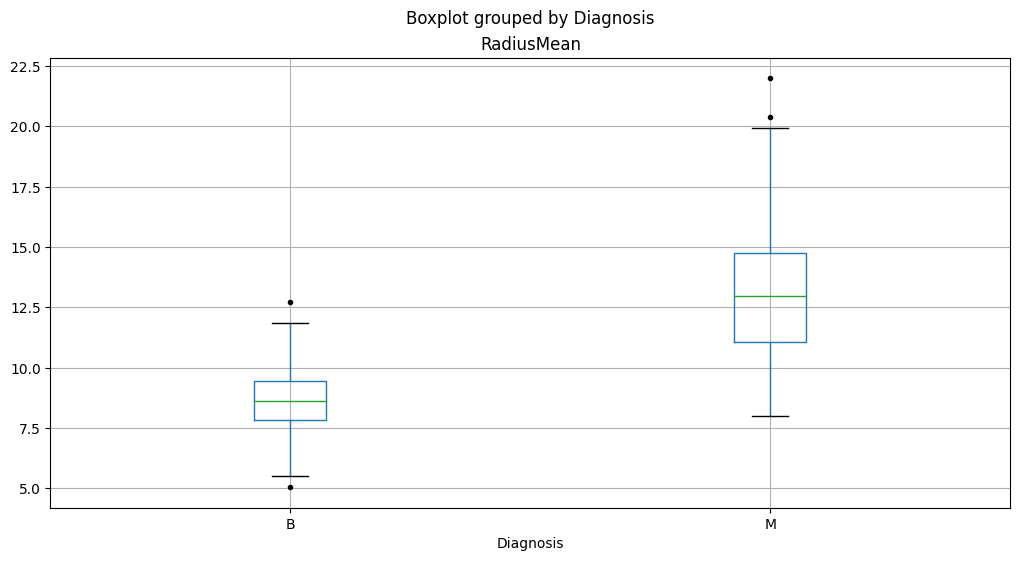

In [567]:
# 12. Determinar y eliminar los valores atípicos (outliers) en la columna RadiusMean.
# Para identificarlos, construye un gráfico tipo boxplot:

df2.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(12,6))

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

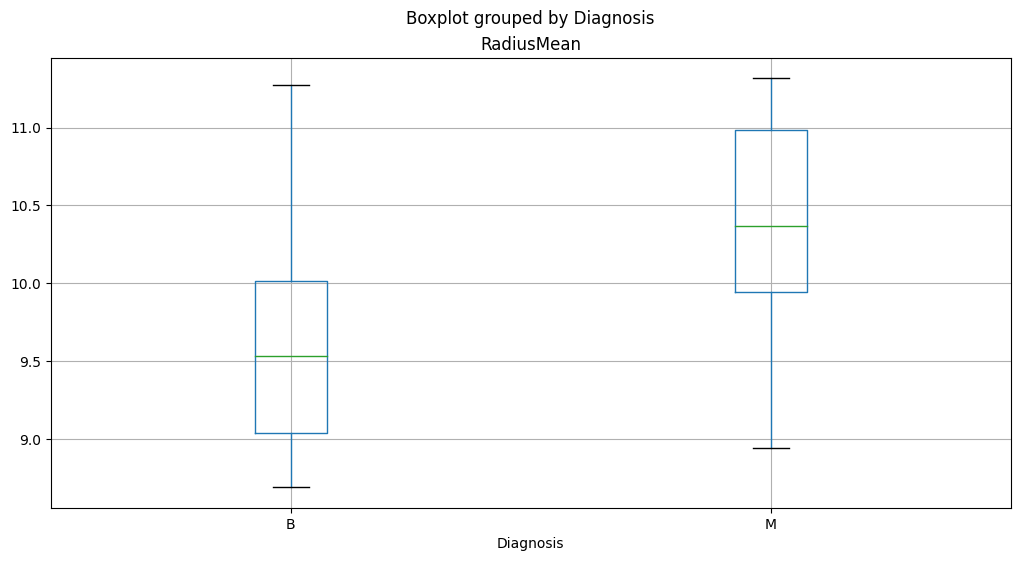

In [568]:
Q1 = df2['RadiusMean'].quantile(0.25)
Q3 = df2['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1

multiplicador = -0.1

limite_inferior = Q1 - multiplicador * IQR
limite_superior = Q3 + multiplicador * IQR

df3 = df2[~((df2['RadiusMean'] < limite_inferior) | (df2['RadiusMean'] > limite_superior))]

df3.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(12,6))

In [569]:
# 13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de
# seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

df3 = df2.drop('Id', axis=1) # Quitamos los valores no relevantes
df3 = df3.drop('Diagnosis', axis=1)
matriz_correlacion = df3.corr()
matriz_correlacion

,DiagnosisNumeric,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
DiagnosisNumeric,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.763319,0.438766,0.771540,0.728840,0.398652,0.595427,0.662430,0.798201,0.398135,0.232023
Radius1,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.988883,0.302530,0.984680,0.965208,0.122970,0.438166,0.560011,0.782587,0.152687,-0.085005
Texture1,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.344008,0.967500,0.349618,0.337352,0.040252,0.273770,0.301006,0.299365,0.097690,0.068357
Perimeter1,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.988371,0.308996,0.989208,0.965610,0.158307,0.484712,0.599186,0.811498,0.183744,-0.036534
Area1,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.981517,0.297465,0.978371,0.983837,0.132547,0.420213,0.553930,0.768902,0.142372,-0.077169
Smoothness1,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.201912,0.015187,0.231768,0.201318,0.921883,0.527141,0.461386,0.535494,0.473544,0.540560
Compactness1,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.530905,0.245573,0.584883,0.512009,0.622558,0.928294,0.850932,0.845325,0.572532,0.690369
Concavity1,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.693128,0.304585,0.733778,0.688960,0.492914,0.814301,0.940384,0.908966,0.464196,0.500474
ConcavePoints1,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.836630,0.293828,0.863123,0.823429,0.501811,0.723725,0.803951,0.963953,0.420492,0.331338
Symmetry1,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.176908,0.089381,0.211160,0.173002,0.500195,0.522421,0.464334,0.457916,0.852396,0.473934


<Axes: >

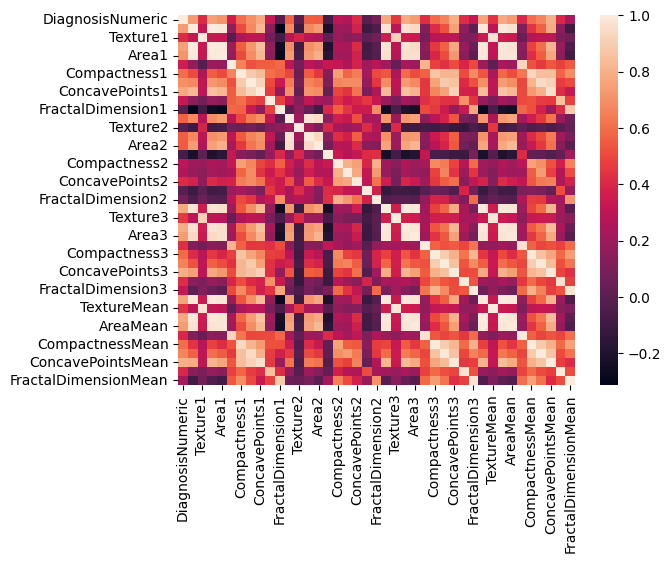

In [570]:
sns.heatmap(matriz_correlacion)

In [571]:
# 14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

print("Los graficos scatterplots y lineplots también servirían para entender mejor los datos")

Los graficos scatterplots y lineplots también servirían para entender mejor los datos
